# EFT analysis on BOSS DR12
--- Series works by Ivanov et al.

## 1. Historical Review of PT codes:

Dark matter only:

- **Standard perturbation theory (SPT)**: the dark matter is treated as a _**pressureless perfect fluid**_ , and the EoMs are solved perturbatively in _**Eulerian space**_ . Problems: by adding higher order terms the power spectrum _**does not behave better at mildly non-linear scales**_ . Also, _**Eulerian**_ perturbation theory _**can not**_ treat BAO wiggles properly in a perturbation expansion.

- **Effective field theory (EFT)**: the _**ideal fluid approximation is inconsistent even on large scales**_ , and the true EoMs are those of _**imperfect fluid**_ with various contributions from _**the effective stress tensor**_ . The effective stress tensor emerges naturally when we study the dynamics of long-wavelength perturbations averaging over the short-scale modes, from Boltzmann equation (which is the true description of the dynamics of the dark matter particles). These terms originated from the effective stress tensor---the counterterms---can be organized in a perturbative expansion. While the form of these counterterms are dictated by symmetry, _**the amplitudes are unknown**_ , and have to be constrainted by data. These counterterms include the poorly known short scale physics, and including them would improves the performance on mildly nonlinear scales significantly. However, as long as the perturbation is still in Eulerian space, the theory can not treat the large scale bulk flow and BAO wiggles properly.

- **Infrared (IR) resummation**: Does not treat the large scale bulk flow perturbatively. On the other hand, for each order of perturbation in Eulerian perturbation theory, the large contribution from the bulk flow can be resummed. This can significantly improve the performance on the BAO wiggles. 

With biased tracers included:

- **Biased tracers expansion**: **local** ($\delta_m$, tidal field) + **non-local** (higher-order derivatives) density field bias expansions. Since the formation of biased tracers in nonlocal in time, at least up to third order expansions are needed to calculate 1-loop power spectrum. 

- **Redshift space distortion (RSD)**: A consistent RSD calculation needs additional counterterms related to the velocity field.

Comparison with Lagrangian perturbatin theory (LPT): LPT includes IR resummatin by default, but the calculation is more complex. However, if account higher orders of perturbation and counterterms properly, the two approaches should confirm with each other.

This work `CLASS-PT` = Eulerian EFT + IR resummation + Biased tracer expansion + proper RSD treatment

## 2. Theoretical Modeling of Galaxy Power Spectrum

The aim of these works is to calculate the _galaxy power spectrum in redshift space_ _correctly_ and _efficiently_ from large scale to mildly nonlinear scale, with an Eulerian effective field theory approach.

Key features:
- Use `FFTLog` to boost the loop integral calculation, fast enough for MCMC evaluation
- **Eulerian EFT** + **IR resummation** + **Biased tracer expansion** + **proper RSD treatment**, can deal with the nonlinear BAO wiggles, biased tracers expansions and RSD properly to mildly nonlinear scales, in order to extract as much information as possible in the galaxy-galaxy power spectrum.



### 2.1. Real Space Dark matter power spectrum

The real space dark matter power spectrum can be decomposed as

\begin{equation*}
P_{mm}(\vec{k},z)=P_{lin}(\vec{k},z) + P_{1-loop,mm}(\vec{k},z) + P_{2-loop,mm}(\vec{k},z) +\ ...
\label{eqn:Pmm_decomp} \tag{1}
\end{equation*}

Where the linear power spectrum $P_{lin}(\vec{k},z)$ is also called _"tree-level"_ power spectrum ($\delta_m^{(1)}(\vec{x},z)$ complete), $P_{1-loop,mm}(\vec{k},z)$ is also called _"Next-to-leading-order (NLO) power spectrum"_ ($\delta_m^{(2)}(\vec{x},z)$ complete) . 

The tree-level power spectrum is simply

\begin{equation*}
P_{lin}(\vec{k},z)=D^2(z)P_{lin}(\vec{k},z=0)
\label{eqn:Pmm_tree} \tag{2}
\end{equation*}

Where the linear growth factor $D(z)=\delta_m(z)/\delta_m(z=0)$ describes the scale-independent evolution of density field, and the linear matter power spectrum $P_{lin}(\vec{k},z=0)$ encodes the scale-dependent physical effects.

The NLO power spectrum is composed by two parts

\begin{equation*}
P_{1-loop,mm}(\vec{k},z)=P_{1-loop,SPT}(\vec{k},z)+P_{ctr}(\vec{k},z)
\label{eqn:Pmm_1loop} \tag{3}
\end{equation*}

Where $P_{1-loop,SPT}(\vec{k},z)$ is the 1-loop correction to real space matter power spectrum in SPT (**where the fluid approximation holds**), and the counterterm $P_{ctr}(\vec{k},z)$ is appended to the 1-loop correction to account for the **stress-tensor** caused by imperfect fluid from EFT assumptions.

The 1-loop correction includes contribution from $\langle \delta_m^{(1)} | \delta_m^{(3)}\rangle$ and $\langle \delta_m^{(2)} | \delta_m^{(2)}\rangle$ terms (other combinations are zero due to Guassianity of $\delta_m^{(1)}$)

\begin{equation*}
P_{1-loop,SPT}(\vec{k},z)=D^4(z)[P_{13}(\vec{k},z=0)+P_{22}(\vec{k},z=0)]
\label{eqn:Pmm_1loopspt} \tag{4}
\end{equation*}

While 

\begin{equation*}
\begin{cases}
P_{22}[P_{lin}(\vec{k})]&=2\int_{\vec{q}} F_2^2(\vec{q},\vec{k}-\vec{q})P_{lin}(\vec{q})P_{lin}(\vec{k}-\vec{q})\\
P_{13}[P_{lin}(\vec{k})]&=6P_{lin}(\vec{k})\int_{\vec{q}} F_3(\vec{k},-\vec{q},\vec{q})P_{lin}(\vec{q})
\end{cases}
\label{eqn:P_13_22} \tag{5}
\end{equation*}

Where $F_{2/3}$ is usual SPT kernels. The counterterm can be writen as 

\begin{equation*}
P_{ctr}(\vec{k},z)=-2c_s^2(z)k^2P_{lin}(\vec{k},z)
\label{eqn:Pmm_ctr} \tag{6}
\end{equation*}

Where the **nuisance parameter** $c_s(z)$ is an effective sound speed. (To understand intuitively, motion caused by pressure $\nabla p\rightarrow c_s\nabla\delta$, isotropy $\rightarrow (\nabla p)^2\rightarrow c_s^2(\nabla\delta)^2$, power spectrum $\rightarrow c_s^2k^2P_{lin}(k)$, isotropy+contribution from 2nd-order derivative of $\delta\rightarrow$ effective sound speed)


**Note:** In this work, the following effects are also treated _approximately_ as modifications to the transfer function
- non-EdS universe: Eqn.$\eqref{eqn:Pmm_1loopspt}$ is only valid in EdS universe $\rightarrow$ EdS SPT kernel + non-EdS $D(z)$ linear growth factor. 
- Massive neutrinos: massive neutrinos would result in a scale-dependent $D(z)$, which makes perturbation theory invalid. Effectively, we use the linear power spectrum of "cold dark matter - baryon fluid" for $P_{tree}$ calculation. Numerical simulation shows that the scale-dependent effects of massive neutrino is mainly suppression in linear scales. For higher order, the suppression is insignificant. So we put a different $P_{tree}$ to account for massive neutrino. Strickly treatment should use Green's function.

### 2.2. Power spectrum of biased tracers

The validty of _perturbative bias expansion_ down to _quasi-linear scales_ is built on top of
- a perturbative theory prediction for the matter density field and tidal field
- a complete parameterization of galaxy bias at each order in perturbation theory

To ensure $P_{gg}$ is complete at NLO, we need to include all parameterization of galaxy bias up to 3rd order ($P_{13}$)

\begin{equation*}
\delta_g = b_1\delta + \epsilon + \frac{b_2}{2}\delta^2 + b_{\mathcal{G}_2}\mathcal{G}_2 + \frac{b_3}{6}\delta^3 + b_{\delta \mathcal{G}_2}\delta \mathcal{G}_2 + b_{\mathcal{G}_3}\mathcal{G}_3 + b_{\Gamma_3}\Gamma_3 + R_{\star}^2\nabla^2\delta
\label{eqn:bias_exp} \tag{7}
\end{equation*}

Where:

- $\delta$/$\delta^2$/$\delta^3$: linear/quadratic/3rd-order bias expansion
- $\epsilon$: stochastic term
- $\mathcal{G}_2$: 2nd-order tidal field operator, $\mathcal{G}_2=Tr[K_{ij}^2[\Phi]]$ where $K_{ij}[\Phi]=(\partial_i\partial_j-\frac{1}{3}\delta_{ij}\nabla^2)\Phi$ (why trace? Lorentzian + additivie)
- $\mathcal{G}_3$: 3rd-order tidal field operator, $\mathcal{G}_3=Tr[K_{ij}^3[\Phi]]$
- $\Gamma_3$: $\mathcal{G}_2(\Phi_g)-\mathcal{G}_2(\Phi_v)$, where $\Phi_g$ is gravity potential and $\Phi_v$ the velocity potential
- $\nabla^2\delta$: could be used to account for non-locallity, e.g. $\delta_g(x)\propto\int g(r)\delta(x-r)dr$ where $g$ is some kernal related with matter collapse and galaxy formation, then expands $\delta(x-r)$ as series of $r^n$ at $x$. $R_\star$ is a characteristic scale below which the perturbation theory fails.

$b_1, b_2, b_3, b_{\delta\mathcal{G}_2}, b_{\mathcal{G}_3}, b_{\Gamma_3}, R_\star$ are generally free parameters.

This perturbative bias expansion would lead to the following real space galaxy power spectrum

\begin{equation*}
\begin{split}
P_{gg}(k,z) = & b_1^2(z)[P_{lin}(k,z)+P_{1-loop,SPT}(k,z)]\\
&+b_1(z)b_2(z)\mathcal{I}_{\delta^2}(k,z)\\
&+2b_1(z)b_{\mathcal{G}_2}(z)\mathcal{I}_{\mathcal{G}_2}(k,z)\\
&+b_1(z)[2b_{\mathcal{G}_2}(z)+\frac{4}{5}b_{\Gamma_3}(z)]\mathcal{F}_{\mathcal{G}_2}(k,z)\\
&+\frac{1}{4}b_2^2(z)\mathcal{I}_{\delta^2\delta^2}(k,z)\\
&+b_{\mathcal{G}_2}^2(z)\mathcal{I}_{\mathcal{G}_2\mathcal{G}_2}(k,z)\\
&+b_2(z)b_{\mathcal{G}_2}(z)\mathcal{I}_{\delta^2\mathcal{G}_2}(k,z)\\
&+P_{\nabla^2\delta}(k,z)\\
&+P_{\epsilon\epsilon}(k,z)
\end{split}
\label{eqn:Pgg_exp} \tag{8}
\end{equation*}

For detailed expressions, see Eqn.(2.11) in the PRD paper. Relevant parameters are: $(b_1,\,b_2,\,b_{\mathcal{G}_2},\,b_{\Gamma_3},\,R_\star)$. After renormalization $(\delta^3,\,\delta\mathcal{G}_2,\,\mathcal{G}_3)$ disapeared.

### 2.3. Power spectrum of biased tracers in redshift space

After applying the RSD, the redshift space galaxy-galaxy power spectrum is modified to

\begin{equation*}
\begin{split}
P_{gg,RSD}(k,\mu,z)=&Z_1^2(\vec{k})P_{lin}(k,z)\\
&+2\int_\vec{q}Z_2^2(\vec{q},\vec{k}-\vec{q})P_{lin}(|\vec{k}-\vec{q}|,z)P_{lin}(q,z)\\
&+6Z_1(\vec{k})P_{lin}(k,z)\int_\vec{q}Z_3(\vec{q},-\vec{q},\vec{k})P_{lin}(q,z)\\
&+P_{ctr,RSD}(k,\mu,z)+P_{\epsilon\epsilon,RSD}(k,\mu,z)
\end{split}
\label{eqn:Pgg_rsd} \tag{9}
\end{equation*}

Where the redshift-space kernels $Z_i(\vec{k})\,(i=1,2,3)$ encodes the anisotropy introduced by RSD

\begin{equation*}
\begin{split}
Z_1(\vec{k}) =& b_1+f\mu^2\\
Z_2(\vec{k_1}, \vec{k_2}) =& \frac{b_2}{2}+b_{\mathcal{G}_2}(\frac{ (\vec{k}_1\cdot\vec{k}_2)^2 }{ k_1^2k_2^2}-1)\\
&+b_1F_2(\vec{k}_1,\vec{k}_2)+f\mu^2G_2(\vec{k}_1,\vec{k}_2)\\
&+\frac{f\mu k}{2}(\frac{\mu_1}{k_1}(b_1+f\mu_2^2)+\frac{\mu_2}{k_2}(b_1+f\mu_1^2))\\
Z_3(\vec{k}_1,\vec{k}_2,\vec{k}_3) =&\ \mathrm{see\ Eqn.(2.14c)\ in\ the\ PRD\ paper}
\end{split}
\label{eqn:rsd_kernel} \tag{10}
\end{equation*}

All the $Z_i(\vec{k})$ have linear and quadratic dependence on $\mu$, which results in the complex expressions of $P_{gg,RSD}^{\ell}(k,z)$.

The counterterm, except for the one inherited from real space matter power spectrum, includes a new term related with $\nabla^4_z\delta$ operator to account for the Finger-of-God effects. The Shot noise $P_{\epsilon\epsilon,RSD}$ also has angular dependency due to RSD. The final expressions for the power spectrum multipole $P_{\ell}(k,z)$
\begin{equation*}
P_{gg,RSD}(k,\mu,z)=\Sigma_{\ell\ even}\mathcal{L}_{\ell}(\mu)P_{\ell}(k,z)
\end{equation*}
See **Eqn.(2.21) in the PRD paper** . Related **nuisance parameters** are $(b_1(z),\,b_2(z),\,b_{\mathcal{G}_2}(z),\,b_{\Gamma_3}(z),\,c_0(z),\,c_2(z),\,\tilde{c}(z),\,P_{shot}(z))$ where $(c_0(z),\,c_2(z),\,\tilde{c}(z)=\tilde{c}_{\nabla^4_z\delta}(z))$ are introduced to account for $(P_{\nabla^2\delta}^{\ell=0}(k,z),\,P_{\nabla^2\delta}^{\ell=2}(k,z),\,P_{\nabla^4_z\delta}^{\ell=0,2}(k,z))$, and $R_\star$ has been absorbed into those effective sound speeds.

### 2.4. IR resummation

The way this work implement the IR resummation is
- Calculate the linear matter power spectrum $P_{lin}(\vec{k})$, in either real space or redshift space, depends on the needs
- Do the wiggly-non-wiggly decomposition
\begin{equation*}
P_{lin}(\vec{k})\equiv P_{nw}(\vec{k})+P_{w}(\vec{k})
\label{eqn:w-nw} \tag{11}
\end{equation*}
- Calculate the damping factor from the non-wiggly part
\begin{equation*}
\Sigma^2(z)=\frac{1}{6\pi^2}\int_0^{k_s} dq P_{nw}(q,z)[1-j_0(q/k_{osc})+2j_2(q/k_{osc})]
\label{eqn:dampingfactor} \tag{12}
\end{equation*}
- Build the IR-resummed LO matter power spectrum by
\begin{equation*}
P_{mm,LO}(k,z)=P_{nw}(k,z)+e^{-k^2\Sigma^2(z)}P_w(k,z)
\end{equation*}
- Feed the new resummed LO matter power spectrum to the derived power spectrum functionals
\begin{equation*}
P_{XY}=P_{tree,XY}[P_{mm,LO}]+P_{1-loop,XY}[P_{mm,LO}]
\end{equation*}
Depends on the tracers, we have
\begin{equation}
P_{tree,XY}=\begin{cases}
&P_{nw}(k,z)+e^{-k^2\Sigma^2(z)}P_w(k,z)(1+k^2\Sigma^2(z)) & (XY)=(mm), real\ space\\
&b_1P_{tree,mm} & (XY)=(mg), real\ space\\
&b_1^2P_{tree,mm} & (XY)=(gg), real\ space\\
&(b_1(z)+f\mu^2)^2(P_{nw}(k,z)+e^{-k^2\Sigma_{tot}^2}P_w(k,z)) & (XY)=(gg), redshift\ space
\end{cases}
\end{equation}
(Note that the extra $k^2\Sigma^2(z)e^{-k^2\Sigma^2(z)}P_w(k,z)$ is to account for re-subtraction in the 1-loop spectrum (?))
See Sect.E in the PRD paper for detailed equations

### 2.5. Alcock-Paczyński effect

The two parameters modeling the AP effect are the distance ratio $\alpha_{\perp}/\alpha_{\parallel}$. This would distort our interpretation of $k$ and $\mu$. We define the $k_{true/obs}$ and $\mu_{true/obs}$ as
- $k_{true}/\mu_{true}$: interpreted in the true cosmological parameters, the same as the real universe. The underlying cosmological parameters are being sampled throughout the MCMC chain
- $k_{obs}/\mu_{obs}$: parameters used to construct the catalog from raw data. These cosmological parameters are fixed by the catalog paper, should not be sampled during MCMC.
During the MCMC sampling, given the catalog cosmological parameters $p_{obs}$ and those being sampled (potentially) true cosmological parameters $p_{true}$, we calculate the distorted theoretical data vector by
- assume $p_{true}$ is the true cosmology, and we are constructing the catalog with $p_{obs}$, then for the observed Fourier space grid $(k,\mu)$, we calculate the corresponding true Fourier space vector $(k_{true}[k_{grid,obs},\mu_{grid,obs}],\mu_{true}[k_{grid,obs},\mu_{grid,obs}])$
- we calculate the theoretical prediction of $P_{gg}$ at $(k_{true},\mu_{true})$
- $P_{obs}(k_{grid,obs},\mu_{grid,obs})=P_{gg}(k_{true},\mu_{true})\frac{D_{A,obs}^2(z)H_{true}(z)}{D_{A,true}^2(z)H_{obs}(z)}$, which is the model vector

## 3. Application to BOSS DR12

### 3.1 Baseline setting and results in _Cosmological parameters from the BOSS galaxy power spectrum_

Sampled parameters:

| Cosmological Parameters | Description | Prior (literature) | Prior (what I used) |
| :- | :- | :- | :- |
| $\omega_{b}$ | physical baryon density | G$[0.02268\pm0.00038]$ | G$[0.02268\pm0.00038]$|
| $\omega_{CDM}$|physical cold dark matter density|F$[0.05, 0.2]$|F$[0.05, 0.2]$|
|$h$|Hubble parameter|F$[0.4, 1]$|F$[0.4, 1]$|
|$A^{1/2}=\sqrt{A_s/A_{s,Planck}}$|relative power spectrum amplitude|F$[0.02, 2]$|F$[0.02, 2]$|
|$\Sigma m_\nu$|neutrino mass|F$[0.06, 0.18]$eV|F$[0.06, 0.18]$eV|

|Nuisance Parameters | Description | Prior (literature) | Prior (what I used) |
| :- | :- | :- | :- |
| $b_1A^{1/2}$ | linear galaxy bias | F$[1,4]$ | F$[1,4]$ |
| $b_2A^{1/2}$ | quadratic galaxy bias | F$[-4,2]$ | G$[0\pm1]$ |
| $b_{\mathcal{G}_2}A^{1/2}$ | 2nd-order tidal bias | F$[-3,3]$ | G$[0\pm1]$ |
| $c_0^2$ | monopole counterterm effective sound speed | F$[-\infty,\infty]$ | G$[0\pm30][h^{-1}$Mpc$]^2$ |
| $c_2^2$ | quadrapole counterm effective sound speed | F$[-\infty,\infty]$ | G$[0\pm30][h^{-1}$Mpc$]^2$ |
| $P_{shot}$ | shot noise | F$[0,10^4]$Mpc$^3/h^3$ | G$[0.5\pm0.5]\times 10^4$Mpc$^3/h^3$ |
| $\tilde{c}$ | FoG counterterm | F$[-\infty,\infty]$ | G$[500\pm500][h^{-1}$Mpc$]^4$|

In [1]:
import classy
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import os
#from montepython.likelihood_class import Likelihood_prior
from numpy.fft import fft, ifft , rfft, irfft , fftfreq
from numpy import exp, log, log10, cos, sin, pi, cosh, sinh , sqrt
from scipy.special import gamma,erf
from scipy import interpolate
from scipy.integrate import quad
import scipy.integrate as integrate
from scipy import special

In [9]:
class BOSS_DR12:
    def __init__(self, i_s):
        self.data_directory = '/Users/jiachuanxu/Workspace/lss_montepython/data'
        self.ksize=48
        self.covmat_file = ['ngc_z3/covmat.dat', 'sgc_z3/covmat.dat', 
                            'ngc_z1/covmat.dat', 'sgc_z1/covmat.dat']
        self.window_file = ['ngc_z3/window.dat', 'sgc_z3/window.dat', 
                            'ngc_z1/window.dat', 'sgc_z1/window.dat']
        self.measurements_file = ['ngc_z3/pk.dat','sgc_z3/pk.dat','ngc_z1/pk.dat','sgc_z1/pk.dat']
        self.legacy_file = ['ngc_z3/pk.dat','sgc_z3/pk_wrong.dat',
                            'ngc_z1/pk.dat','sgc_z1/pk.dat']
        self.z = [0.61, 0.61, 0.38, 0.38]
        #self.use_nuisance =['norm','b^{(1)}_1','b^{(1)}_2','b^{(1)}_{G_2}']

        # First load in data
        self.k = np.zeros(self.ksize,'float64')
        self.Pk0 = np.zeros(self.ksize,'float64')
        self.Pk2 = np.zeros(self.ksize,'float64')
        self.Pk0_err = np.zeros(self.ksize,'float64')
        self.Pk2_err = np.zeros(self.ksize,'float64')
        self.k_legacy = np.zeros(self.ksize,'float64')
        self.Pk0_legacy = np.zeros(self.ksize,'float64')
        self.Pk2_legacy = np.zeros(self.ksize,'float64')

        self.cov = np.zeros(
            (2*self.ksize, 2*self.ksize), 'float64')
        # read covmat, (2ksize)x(2ksize)
        datafile = open(os.path.join(self.data_directory, self.covmat_file[i_s-1]), 'r')
        for i in range(2*self.ksize):
            line = datafile.readline()
            while line.find('#') != -1:
                line = datafile.readline()
            for j in range(2*self.ksize):
                self.cov[i,j] = float(line.split()[j])
                if i==j:
                    if i<self.ksize:
                        self.Pk0_err[i]=self.cov[i,i]**0.5
                    else:
                        self.Pk2_err[i-self.ksize]=self.cov[i,i]**0.5
        datafile.close()
        self.logdetcov = np.linalg.slogdet(self.cov)[1]
        # read data vector, ksize
        datafile = open(os.path.join(self.data_directory, self.measurements_file[i_s-1]), 'r')
        for i in range(self.ksize):
            line = datafile.readline()
            while line.find('#') != -1:
                line = datafile.readline()
            self.k[i] = float(line.split()[0])
            self.Pk0[i] = float(line.split()[1])
            self.Pk2[i] = float(line.split()[2])
        datafile.close()
        self.stack_dat = np.hstack([self.Pk0,self.Pk2])
        # read legacy data vector, ksize
        datafile = open(os.path.join(self.data_directory, self.legacy_file[i_s-1]), 'r')
        for i in range(self.ksize):
            line = datafile.readline()
            while line.find('#') != -1:
                line = datafile.readline()
            self.k_legacy[i] = float(line.split()[0])
            self.Pk0_legacy[i] = float(line.split()[1])
            self.Pk2_legacy[i] = float(line.split()[2])
        datafile.close()
        self.stack_legacy_dat = np.hstack([self.Pk0_legacy,self.Pk2_legacy])
        # read window function, 128 x 3
        self.Nmax=128
        self.W0 = np.zeros((self.Nmax))
        self.W2 = np.zeros((self.Nmax))
        self.W4 = np.zeros((self.Nmax))
        datafile = open(os.path.join(self.data_directory, self.window_file[i_s-1]), 'r')
        for i in range(self.Nmax):
            line = datafile.readline()
            while line.find('#') != -1:
                line = datafile.readline()
            self.W0[i] = float(line.split()[0])
            self.W2[i] = float(line.split()[1])
            self.W4[i] = float(line.split()[2])
        datafile.close()

        # Precompute useful window function things
        kmax = 100.
        self.k0 = 1.e-4

        self.rmin = 0.01
        rmax = 1000.
        b = -1.1001
        bR = -2.001

        Delta = log(kmax/self.k0) / (self.Nmax - 1)
        Delta_r = log(rmax/self.rmin) / (self.Nmax - 1)
        i_arr = np.arange(self.Nmax)
        rtab = self.rmin * exp(Delta_r * i_arr)

        self.kbins3 = self.k0 * exp(Delta * i_arr)
        self.tmp_factor = exp(-1.*b*i_arr*Delta)
        self.tmp_factor2 = exp(-1.*bR*i_arr*Delta_r)

        jsNm = np.arange(-self.Nmax//2,self.Nmax//2+1,1)
        self.etam = b + 2*1j*pi*(jsNm)/self.Nmax/Delta

        def J_func(r,nu):
            gam = special.gamma(2+nu)
            r_pow = r**(-3.-1.*nu)
            sin_nu = np.sin(pi*nu/2.)
            J0 = -1.*sin_nu*r_pow*gam/(2.*pi**2.)
            J2 = -1.*r_pow*(3.+nu)*gam*sin_nu/(nu*2.*pi**2.)
            return J0,J2

        self.J0_arr,self.J2_arr = J_func(rtab.reshape(-1,1),self.etam.reshape(1,-1))

        self.etamR = bR + 2*1j*pi*(jsNm)/self.Nmax/Delta_r

        def Jk_func(k,nu):
            gam = special.gamma(2+nu)
            k_pow = k**(-3.-1.*nu)
            sin_nu = np.sin(pi*nu/2.)
            J0k = -1.*k_pow*gam*sin_nu*(4.*pi)
            J2k = -1.*k_pow*(3.+nu)*gam*sin_nu*4.*pi/nu
            return J0k,J2k

        self.J0k_arr,self.J2k_arr = Jk_func(self.kbins3.reshape(-1,1),self.etamR.reshape(1,-1))

        # Compute window response matrix
        resp00 = np.zeros((self.ksize,self.Nmax))
        resp02 = np.zeros((self.ksize,self.Nmax))
        resp20 = np.zeros((self.ksize,self.Nmax))
        resp22 = np.zeros((self.ksize,self.Nmax))
        for i in range(self.Nmax):
            tmp_resp0 = self.window_response(0,i)
            tmp_resp2 = self.window_response(2,i)
            resp00[:,i] = tmp_resp0[0]
            resp20[:,i] = tmp_resp0[1]
            resp02[:,i] = tmp_resp2[0]
            resp22[:,i] = tmp_resp2[1]
        resp0 = np.hstack([resp00,resp02])
        resp2 = np.hstack([resp20,resp22])
        self.response_matrix = np.vstack([resp0,resp2])
        
    def window_response(self, l_i,k_index):

        Nmax = self.Nmax
        k0 = self.k0

        Pdiscrin0 = np.zeros(Nmax)
        Pdiscrin2 = np.zeros(Nmax)

        if l_i==0:
            Pdiscrin0[k_index] = 1
        if l_i==2:
            Pdiscrin2[k_index] = 1

        cm0 = np.fft.fft(Pdiscrin0)/ Nmax
        cm2 = np.fft.fft(Pdiscrin2)/ Nmax
        cmsym0 = np.zeros(Nmax+1,dtype=np.complex_)
        cmsym2 = np.zeros(Nmax+1,dtype=np.complex_)

        all_i = np.arange(Nmax+1)
        f = (all_i+2-Nmax//2) < 1
        cmsym0[f] = k0**(-self.etam[f])*np.conjugate(cm0[-all_i[f]+Nmax//2])
        cmsym2[f] = k0**(-self.etam[f])*np.conjugate(cm2[-all_i[f]+Nmax//2])
        cmsym0[~f] = k0**(-self.etam[~f])*cm0[all_i[~f]-Nmax//2]
        cmsym2[~f] = k0**(-self.etam[~f])*cm2[all_i[~f]-Nmax//2]

        cmsym0[-1] = cmsym0[-1] / 2
        cmsym0[0] = cmsym0[0] / 2
        cmsym2[-1] = cmsym2[-1] / 2
        cmsym2[0] = cmsym2[0] / 2

        xi0 = np.real(cmsym0*self.J0_arr).sum(axis=1)
        xi2 = np.real(cmsym2*self.J2_arr).sum(axis=1)

        i_arr = np.arange(Nmax)
        Xidiscrin0 = (xi0*self.W0 + 0.2*xi2*self.W2)*self.tmp_factor2
        Xidiscrin2 = (xi0*self.W2 + xi2*(self.W0 + 2.*(self.W2+self.W4)/7.))*self.tmp_factor2

        cmr0 = np.fft.fft(Xidiscrin0)/ Nmax
        cmr2 = np.fft.fft(Xidiscrin2)/ Nmax

        cmsymr0 = np.zeros(Nmax+1,dtype=np.complex_)
        cmsymr2 = np.zeros(Nmax+1,dtype=np.complex_)

        arr_i = np.arange(Nmax+1)
        f = (arr_i+2-Nmax//2)<1

        cmsymr0[f] = self.rmin**(-self.etamR[f])*np.conjugate(cmr0[-arr_i[f] + Nmax//2])
        cmsymr2[f] =  self.rmin**(-self.etamR[f])*np.conjugate(cmr2[-arr_i[f] + Nmax//2])
        cmsymr0[~f] = self.rmin**(-self.etamR[~f])* cmr0[arr_i[~f] - Nmax//2]
        cmsymr2[~f] = self.rmin**(-self.etamR[~f])* cmr2[arr_i[~f] - Nmax//2]

        cmsymr0[-1] = cmsymr0[-1] / 2
        cmsymr0[0] = cmsymr0[0] / 2
        cmsymr2[-1] = cmsymr2[-1] / 2
        cmsymr2[0] = cmsymr2[0] / 2

        P0t = np.real(cmsymr0*self.J0k_arr).sum(axis=1)
        P2t = np.real(cmsymr2*self.J2k_arr).sum(axis=1)

        P0int = interpolate.InterpolatedUnivariateSpline(self.kbins3,P0t)(self.k)
        P2int = interpolate.InterpolatedUnivariateSpline(self.kbins3,P2t)(self.k)

        return P0int,P2int
    
    def get_theory_raw(self, cosmo, nuisance_param_dict, z=0.61):
        nui_keys = nuisance_param_dict.keys()
        norm = nuisance_param_dict['norm'] if 'norm' in nui_keys else 1.
        b1 = nuisance_param_dict['b_1'] if 'b_1' in nui_keys else 1.9
        b2 = nuisance_param_dict['b_2'] if 'b_2' in nui_keys else 0.
        bG2 = nuisance_param_dict['bg_2'] if 'bg_2' in nui_keys else 0.
        css0 = nuisance_param_dict['c0'] if 'c0' in nui_keys else 0.
        css2 = nuisance_param_dict['c2'] if 'c2' in nui_keys else 30.
        b4 = nuisance_param_dict['c4'] if 'c4' in nui_keys else 500.
        Pshot = nuisance_param_dict['Pshot'] if 'Pshot' in nui_keys else 0.
        h = cosmo.h()
        bGamma3 = 0.
        a2 = 0.
        fz = cosmo.scale_independent_growth_factor_f(z)

        # Run CLASS-PT
        all_theory = cosmo.get_pk_mult(self.kbins3*h, z, self.Nmax)

        # Compute usual theory model
        kinloop1 = self.kbins3 * h

        theory2 =   (   norm**2.*all_theory[18] \
                        +norm**4.*(all_theory[24]) \
                        +norm**1.*b1*all_theory[19] \
                        +norm**3.*b1*(all_theory[25]) \
                        +b1**2.*norm**2.*all_theory[26] \
                        +b1*b2*norm**2.*all_theory[34] \
                        +b2*norm**3.*all_theory[35] \
                        +b1*bG2*norm**2.*all_theory[36] \
                        +bG2*norm**3.*all_theory[37] \
                        +2.*(css2)*norm**2.*all_theory[12]/h**2. \
                        +(2.*bG2+0.8*bGamma3)*norm**3.*all_theory[9] \
                    )*h**3. \
                    +fz**2.*b4*self.kbins3**2. * ((norm**2.*fz**2.*70. + 165.*fz*b1*norm+99.*b1**2.)*\
                                                      4./693.) * (35./8.) * all_theory[13] * h

        theory0 =   (   norm**2.*all_theory[15] \
                        +norm**4.*(all_theory[21]) \
                        +norm**1.*b1*all_theory[16] \
                        +norm**3.*b1*(all_theory[22]) \
                        +norm**0.*b1**2.*all_theory[17] \
                        +norm**2.*b1**2.*all_theory[23] \
                        +0.25*norm**2.*b2**2.*all_theory[1] \
                        +b1*b2*norm**2.*all_theory[30] \
                        +b2*norm**3.*all_theory[31] \
                        +b1*bG2*norm**2.*all_theory[32] \
                        +bG2*norm**3.*all_theory[33] \
                        +b2*bG2*norm**2.*all_theory[4] \
                        +bG2**2.*norm**2.*all_theory[5] \
                        +2.*css0*norm**2.*all_theory[11]/h**2. \
                        +(2.*bG2+0.8*bGamma3)*norm**2.*(b1*all_theory[7]+norm*all_theory[8]) \
                    )*h**3. \
                    +Pshot \
                    +fz**2.*b4*self.kbins3**2. * ( norm**2.*fz**2./9. + 2.*fz*b1*norm/7. + b1**2./5 ) * \
        (35./8.) * all_theory[13] * h
        return theory0, theory2
    
    def get_theory(self, cosmo, nuisance_param_dict, z=0.61):
        h = cosmo.h()
        
        theory0, theory2 = self.get_theory_raw(cosmo, nuisance_param_dict, z)
        theory0_ = np.vstack([theory0]).T
        theory2_ = np.vstack([theory2]).T

        factor = (np.exp(-1.*(self.kbins3*h/2.)**4.)*self.tmp_factor)[:,np.newaxis]
        Pdisc = np.vstack([theory0_*factor,theory2_*factor])
        # comvolve with BOSS DR12 mask
        theory = np.matmul(self.response_matrix,Pdisc[:,0])

        return theory[:self.ksize],theory[self.ksize:]
    
    def get_cov_marg(self, cosmo, nuisance_param_dict, z=0.61):
        h = cosmo.h()
        nui_keys = nuisance_param_dict.keys()
        norm = nuisance_param_dict['norm'] if 'norm' in nui_keys else 1.
        b1 = nuisance_param_dict['b_1'] if 'b_1' in nui_keys else 1.9
        bGamma3 = 0.
        a2 = 0.
        Nmax = self.Nmax
        k0 = self.k0
        fz = cosmo.scale_independent_growth_factor_f(z)
        css0sig = 30.
        css2sig = 30.
        b4sig = 500.
        Pshotsig = 5e3
        Nmarg = 4 # number of parameters to marginalize
        # Run CLASS-PT
        all_theory = cosmo.get_pk_mult(self.kbins3*h, z, Nmax)
        # Compute usual theory model
        kinloop1 = self.kbins3 * h
        # Pieces with linear dependencies on biases
        dtheory2_dcss0 = np.zeros_like(self.kbins3)
        dtheory2_dcss2 = (2.*norm**2.*all_theory[12]/h**2.)*h**3.
        dtheory2_db4 = (2.*(0.*kinloop1**2.)*norm**2.*all_theory[12]/h**2.)*h**3. + \
            fz**2.*self.kbins3**2.*((norm**2.*fz**2.*70. + 165.*fz*b1*norm+99.*b1**2.)*4./693.)*\
            (35./8.)*all_theory[13]*h
        dtheory2_dPshot = np.zeros_like(self.kbins3)

        dtheory0_dcss0 = (2.*norm**2.*all_theory[11]/h**2.)*h**3.
        dtheory0_dcss2 = np.zeros_like(self.kbins3)
        dtheory0_db4 = fz**2.*self.kbins3**2.*(norm**2.*fz**2./9. + 2.*fz*b1*norm/7. + b1**2./5)*\
        (35./8.)*all_theory[13]*h
        dtheory0_dPshot = np.ones_like(self.kbins3)

        # Put all into a vector for simplicity
        theory0vec = np.vstack([dtheory0_dcss0,dtheory0_dcss2,dtheory0_db4,dtheory0_dPshot]).T
        theory2vec = np.vstack([dtheory2_dcss0,dtheory2_dcss2,dtheory2_db4,dtheory2_dPshot]).T

        i_arr = np.arange(Nmax)
        factor = (exp(-1.*(self.kbins3*h/2.)**4.)*self.tmp_factor)[:,np.newaxis]
        Pdisc = np.vstack([theory0vec*factor,theory2vec*factor])

        # Compute marginalized covariance with window-convolved derivatives
        deriv_stack = np.inner(self.response_matrix,Pdisc[:,0:].T)
        marg_cov = self.cov + css0sig**2*np.outer(deriv_stack[:,0],deriv_stack[:,0]) + \
            css2sig**2*np.outer(deriv_stack[:,1],deriv_stack[:,1]) + \
            b4sig**2*np.outer(deriv_stack[:,2], deriv_stack[:,2]) + \
            Pshotsig**2*np.outer(deriv_stack[:,3],deriv_stack[:,3])
        return marg_cov
        
    def getchi2(self, cosmo, nuisance_param_dict, z=0.61):
        h = cosmo.h()
        nui_keys = nuisance_param_dict.keys()
        b2 = nuisance_param_dict['b_2'] if 'b_2' in nui_keys else 0.
        bG2 = nuisance_param_dict['bg_2'] if 'bg_2' in nui_keys else 0.
        theory0, theory2 = self.get_theory_raw(cosmo, nuisance_param_dict, z)
        theory0_ = np.vstack([theory0]).T
        theory2_ = np.vstack([theory2]).T
        factor = (np.exp(-1.*(self.kbins3*h/2.)**4.)*self.tmp_factor)[:,np.newaxis]
        Pdisc = np.vstack([theory0_*factor,theory2_*factor])
        
        marg_cov = self.get_cov_marg(cosmo, nuisance_param_dict, z)
        invcov_marg = np.linalg.inv(marg_cov)
        
        # Now convolve with window function
        invcovW = np.matmul(self.response_matrix.T,invcov_marg)
        invcovWW = np.matmul(self.response_matrix.T,np.matmul(invcov_marg,self.response_matrix))

        # Now compute chi^2
        chi2 = np.inner(Pdisc[:,0],np.inner(invcovWW,Pdisc[:,0]))
        chi2 += np.inner(self.stack_dat,np.inner(invcov_marg,self.stack_dat))
        chi2 += -2.*np.inner(Pdisc[:,0],np.inner(invcovW,self.stack_dat))

        # Add priors
        chi2 += (b2 - 0.)**2./1**2. + (bG2 - 0.)**2/1**2.

        # Add determinants (depending on cosmology)
        chi2 += np.linalg.slogdet(marg_cov)[1] - self.logdetcov # add on trace-log part and remove unmarginalized part (independent of cosmology)
        return chi2
    
    def getchi2_wrt_fid(self, cosmo_model, nuisance_param_dict_model, 
                        cosmo_data, nuisance_param_dict_data, z=0.61):
        h_model = cosmo_model.h()
        h_data = cosmo_data.h()
        nui_keys_model = nuisance_param_dict_model.keys()
        nui_keys_data = nuisance_param_dict_data.keys()
        b2_model = nuisance_param_dict_model['b_2'] if 'b_2' in nui_keys_model else 0.
        bG2_model = nuisance_param_dict_model['bg_2'] if 'bg_2' in nui_keys_model else 0.
        b2_data = nuisance_param_dict_data['b_2'] if 'b_2' in nui_keys_data else 0.
        bG2_data = nuisance_param_dict_data['bg_2'] if 'bg_2' in nui_keys_data else 0.
        theory0_model, theory2_model = self.get_theory_raw(cosmo_model, nuisance_param_dict_model, z)
        theory0_model_ = np.vstack([theory0_model]).T
        theory2_model_ = np.vstack([theory2_model]).T
        theory0_data, theory2_data = self.get_theory_raw(cosmo_data, nuisance_param_dict_data, z)
        theory0_data_ = np.vstack([theory0_data]).T
        theory2_data_ = np.vstack([theory2_data]).T
        factor_model = (np.exp(-1.*(self.kbins3*h_model/2.)**4.)*self.tmp_factor)[:,np.newaxis]
        factor_data = (np.exp(-1.*(self.kbins3*h_data/2.)**4.)*self.tmp_factor)[:,np.newaxis]
        Pdisc_model = np.vstack([theory0_model_*factor_model,theory2_model_*factor_model])
        Pdisc_data = np.vstack([theory0_data_*factor_data,theory2_data_*factor_data])
        Pdisc = Pdisc_model-Pdisc_data
        
        marg_cov = self.get_cov_marg(cosmo_data, nuisance_param_dict_data, z)
        invcov_marg = np.linalg.inv(marg_cov)
        
        # Now convolve with window function
        invcovWW = np.matmul(self.response_matrix.T,np.matmul(invcov_marg,self.response_matrix))

        # Now compute chi^2
        chi2 = np.inner(Pdisc[:,0],np.inner(invcovWW,Pdisc[:,0]))

        # Add priors
        chi2 += (b2_model - 0.)**2./1**2. + (bG2_model - 0.)**2/1**2.

        # Add determinants (depending on cosmology)
        #chi2 += np.linalg.slogdet(marg_cov)[1] - self.logdetcov # add on trace-log part and remove unmarginalized part (independent of cosmology)

        return chi2
    def get_Pgg_err_marg(self, cosmo, nuisance_param_dict, z=0.61):
        marg_cov = self.get_cov_marg(cosmo, nuisance_param_dict, z)
        Pk0_err_marg = np.zeros(self.ksize,'float64')
        Pk2_err_marg = np.zeros(self.ksize,'float64')
        for i in range(self.ksize):
            Pk0_err_marg[i] = marg_cov[i,i]**0.5
            Pk2_err_marg[i] = marg_cov[i+self.ksize,i+self.ksize]**0.5
        return Pk0_err_marg, Pk2_err_marg

In [15]:
### Set CLASS model for Ivanov et al. best-fitting parameters
### They fit for each data set {ngc_z3, sgc_z3, ngc_z1, sgc_z1} separately
common_settings = {
    # fixed LambdaCDM parameters
    'k_pivot':0.05,'A_s':2.0989e-9,'n_s':0.9649,'tau_reio':0.0543,'YHe':0.2425,
    # neutrino modeling: 1 massive + 2 massless
    'N_ur':2.0328,'N_ncdm':1,'T_ncdm':0.71611,
    # nonlinear modeling
    'non linear':'PT',
    # BAO modeling
    'IR resummation':'Yes',
    # bias tracer modeling
    'Bias tracers':'Yes',
    # RSD modeling
    'RSD':'Yes',
    # Alcockc-Paczynski effect
    'AP':'Yes',
    # other output and precision parameters
    'P_k_max_h/Mpc':100.0,'output':'mPk','cb':'Yes','Omfid':0.31
}
separate_settings = [
    {'h':0.704, 'omega_b':2.242e-2, 'omega_cdm':0.1334, 'm_ncdm':0.122, 'z_pk':0.61},
    {'h':0.639, 'omega_b':2.234e-2, 'omega_cdm':0.1135, 'm_ncdm':0.077, 'z_pk':0.61},
    {'h':0.662, 'omega_b':2.240e-2, 'omega_cdm':0.1054, 'm_ncdm':0.154, 'z_pk':0.38},
    {'h':0.683, 'omega_b':2.236e-2, 'omega_cdm':0.1082, 'm_ncdm':0.170, 'z_pk':0.38}
]
### initialize Class objects
M_lite = []
for i,sep_set in enumerate(separate_settings):
    M_ = Class()
    M_.set(common_settings);M_.set(sep_set)
    M_.compute()
    M_lite.append(M_)
'''
# best-fitting parameters of my chain
mychain_settings = {'h':6.892876e-01, 'omega_b':2.263645e-02, 'omega_cdm':1.194926e-01, 
                    'm_ncdm':9.986281e-02,'z_pk':'0.38,0.61'}
M_mine = Class()
M_mine.set(common_settings);M_mine.set(mychain_settings)
M_mine.compute()
'''

"\n# best-fitting parameters of my chain\nmychain_settings = {'h':6.892876e-01, 'omega_b':2.263645e-02, 'omega_cdm':1.194926e-01, \n                    'm_ncdm':9.986281e-02,'z_pk':'0.38,0.61'}\nM_mine = Class()\nM_mine.set(common_settings);M_mine.set(mychain_settings)\nM_mine.compute()\n"

In [29]:
### Class model with 3-degenerate massive neutrino
TriDeg_settings = {
    # cosmological parameters sampled
    'h':0.68,'omega_b':2.268e-2,'omega_cdm':0.1232, 'n_s':0.9649, 'm_ncdm':0.06/3.,
    # fixed LambdaCDM parameters
    'k_pivot':0.05,'A_s':2.0989e-9,'tau_reio':0.0543,'YHe':0.2425,
    # neutrino modeling: 3-deg massive
    'N_ur':0.00641,'N_ncdm':1,'deg_ncdm':3,'T_ncdm':0.71611,
    # nonlinear modeling
    'non linear':'PT',
    # BAO modeling
    'IR resummation':'Yes',
    # biased tracer
    'Bias tracers':'Yes',
    # RSD modeling
    'RSD':'Yes',
    # AP modeling
    'AP':'Yes',
    # other output and precision parameters
    'P_k_max_h/Mpc':100.0,'output':'mPk','cb':'Yes','z_pk':'0.38,0.61','Omfid':0.31
}
M_trideg = Class()
M_trideg.set(TriDeg_settings)
M_trideg.compute()

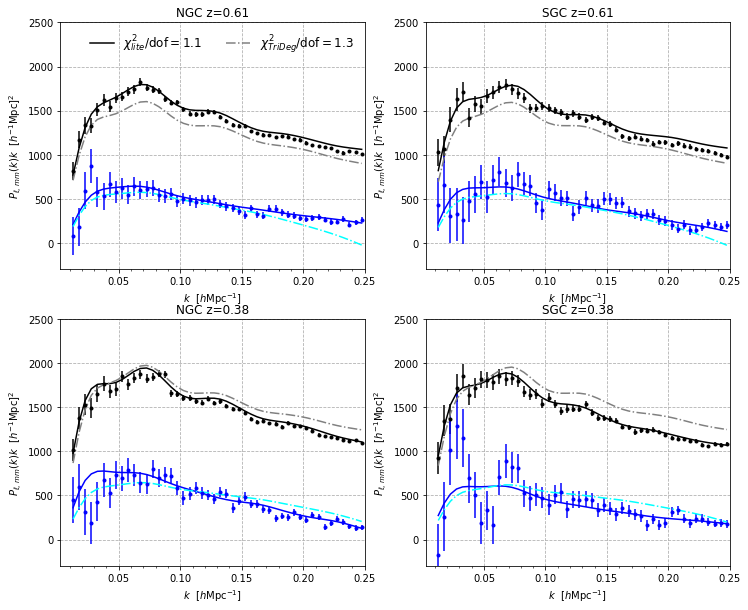

In [30]:
z_target = [0.61, 0.61, 0.38, 0.38]
title_list = ['NGC z=0.61', 'SGC z=0.61', 'NGC z=0.38', 'SGC z=0.38']
### Initialize BOSS DR12 objects
dr12 = []
for i in range(4):
    dr12_ = BOSS_DR12(i+1)
    dr12.append(dr12_)
kvec = np.logspace(-3,np.log10(3),1000) # array of kvec in h/Mpc
### Create figures
fig_Pkmz, ax_Pkmz = plt.subplots(2,2, figsize=[12,10])
axis_list = [ax_Pkmz[0,0], ax_Pkmz[0,1], ax_Pkmz[1,0], ax_Pkmz[1,1]]
##### NUISANCE PARAMETERS ####
pn_list = [
    {'norm':np.sqrt(0.744),'b_1':1.926,'b_2':-2.77,'bg_2':0.47,'c0':-53.44,'c2':-21.0,'c4':187,'Pshot':1.32e3},
    {'norm':np.sqrt(0.934),'b_1':2.109,'b_2':-1.61,'bg_2':0.13,'c0':-14.1,'c2':23.0,'c4':203,'Pshot':0.97e3},
    {'norm':np.sqrt(1.442),'b_1':1.895,'b_2':-2.57,'bg_2':-0.15,'c0':-22.9,'c2':15.8,'c4':479,'Pshot':2.68e3},
    {'norm':np.sqrt(0.996),'b_1':1.885,'b_2':-3.00,'bg_2':0.43,'c0':-18.1,'c2':-12.2,'c4':209,'Pshot':5.56e3}
]
'''
# mine 
mine_pn = {
    'norm':(1.561604e-09/2.0989e-9)**0.5,
    'b^{(1)}_1':1.930355e+00, 'b^{(1)}_2':-1.323526e+00, 'b^{(1)}_{G_2}':-2.161099e-01,
    'b^{(2)}_1':1.973587e+00, 'b^{(2)}_2':-8.441838e-01, 'b^{(2)}_{G_2}':-1.845393e-02,
    'b^{(3)}_1':1.807211e+00, 'b^{(3)}_2':-7.442394e-01, 'b^{(3)}_{G_2}':-1.688524e-01,
    'b^{(4)}_1':1.855811e+00, 'b^{(4)}_2':-3.798578e-01, 'b^{(4)}_{G_2}':3.710517e-02,
}
'''
pn_trideg = {
    'norm':0.8,
    'b^{(1)}_1':1.930355e+00, 'b^{(1)}_2':-1.323526e+00, 'b^{(1)}_{G_2}':-2.161099e-01,
    'b^{(2)}_1':1.973587e+00, 'b^{(2)}_2':-8.441838e-01, 'b^{(2)}_{G_2}':-1.845393e-02,
    'b^{(3)}_1':1.807211e+00, 'b^{(3)}_2':-7.442394e-01, 'b^{(3)}_{G_2}':-1.688524e-01,
    'b^{(4)}_1':1.855811e+00, 'b^{(4)}_2':-3.798578e-01, 'b^{(4)}_{G_2}':3.710517e-02,
}

## Initialize the convenience functions pk_mm_real, pk_gg_l0 etc.
for i,M in enumerate(M_lite):
    M.initialize_output(kvec*M.h(), z_target[i], len(kvec))
M_trideg.initialize_output(kvec*M_trideg.h(), 0.61, len(kvec))

### Loop through each dataset in {ngc_z3, sgc_z3, ngc_z1, sgc_z3}
for i,dr in enumerate(dr12):
    ### Calculate Model Vectors
    ### =======================
    # Class model
    M = M_lite[i]
    # nuisance params
    pn = pn_list[i]
    # dataset redshift
    z_data = z_target[i]
    ### best-fitting model vector from Ivanov et al.
    # get best-fitting model vector for each dataset separately
    pk_g0_lite, pk_g2_lite = dr.get_theory(M, pn, z=z_data)
    # get chi2 of this best-fitting model vector
    chi2_lite = dr.getchi2(M, pn, z=z_data)
    
    ### Tri-Degenerate massive neutrino model
    # get model vector given the parameters
    pk_g0_trideg, pk_g2_trideg = dr.get_theory(M_trideg, pn_trideg, z=z_data)
    # get chi2
    chi2_trideg = dr.getchi2(M_trideg, pn_trideg, z=z_data)
    
    ### Plotting Routine
    ### ================
    ax = axis_list[i]
    title = title_list[i]
    ### data vector with errorbar
    ax.errorbar(dr.k, dr.Pk0*dr.k, yerr=dr.Pk0_err*dr.k,fmt='.k')
    ax.errorbar(dr.k, dr.Pk2*dr.k, yerr=dr.Pk2_err*dr.k,fmt='.b')
    ### prediction from literature
    ax.plot(dr.k, np.array(pk_g0_lite)*dr.k, color='k',linestyle='-',
                  label=r'$\chi_{lite}^2/\mathrm{dof}={%.1f}$'%(chi2_lite/(48*2-12)))
    ax.plot(dr.k, np.array(pk_g2_lite)*dr.k, color='b',linestyle='-')
    ### prediction from 3-degenerate massive neutrino model
    ax.plot(dr.k,np.array(pk_g0_trideg)*dr.k, color='gray',linestyle='-.',
                  label=r'$\chi_{TriDeg}^2/\mathrm{dof}={%.1f}$'%(chi2_trideg/(48*2-12)))
    ax.plot(dr.k,np.array(pk_g2_trideg)*dr.k, color='cyan',linestyle='-.')
    '''
    # overplot errorbar from analytical marginalization
    ax.errorbar(dr.k,np.array(pk_g0_mine)*dr.k, yerr=pk_g0_err_marg/10.,
                      color='gray',linestyle='-.', label=r'$\frac{\chi_{mine}^2}{N_{dof}}=\frac{{{{%.1f}}}}{{{%d}}}$'%(chi2_mine_ngc_z3,48*2-12))
    ax.errorbar(dr.k,np.array(pk_g2_mine)*dr.k, yerr=pk_g2_err_marg/10.,
                      color='cyan',linestyle='-.')
    '''
    ### plot style customization
    ax.set_xlim([0.0025,0.25])
    ax.set_ylim([-300,2500])
    ax.grid(linestyle='--')
    ax.xaxis.set_minor_locator(MultipleLocator(0.01))
    ax.set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
    ax.set_ylabel(r'$P_{\ell,\,mm}(k)k\,\,\,\, [h^{-1}\mathrm{Mpc}]^{2}$')
    ax.set_title(title)
# add legend in the first panel
axis_list[0].legend(fontsize='12',ncol=2,loc='upper right', frameon=False)
plt.show()
#plt.savefig("bestfit_vis.pdf", format='pdf')

### 3.2 Baseline setting and results in _The PRD paper_

### 3.3 Generate theoretical data vector

To make debugging easier, we generate a theoretical data vector, assuming a fiducial cosmology and realistic systematics from BOSS DR12.

In [4]:
FiducialCosmology = {
    # fixed LambdaCDM parameters
    'k_pivot':0.05,
    'A_s':2.0989e-9,
    'n_s':0.9649,
    'tau_reio':0.0543,
    'YHe':0.2425,
    'h':0.6893,
    'omega_b':2.264e-02,
    'omega_cdm':0.1195,
    'm_ncdm':9.986e-02,
    #'N_eff':3.046,
    'N_ur':2.0328,
    'N_ncdm':1,
    'T_ncdm':0.71611,
    # other output and precision parameters
    'z_pk':'0.38,0.61',
    'P_k_max_h/Mpc':100.0,
    'output':'mPk',
    'non linear':'PT',
    'IR resummation':'Yes',
    'Bias tracers':'Yes',
    'cb':'Yes',
    'RSD':'Yes',
    'AP':'Yes',
    'Omfid':0.31
}

M_fiducial = Class()
M_fiducial.set(FiducialCosmology)
M_fiducial.compute()

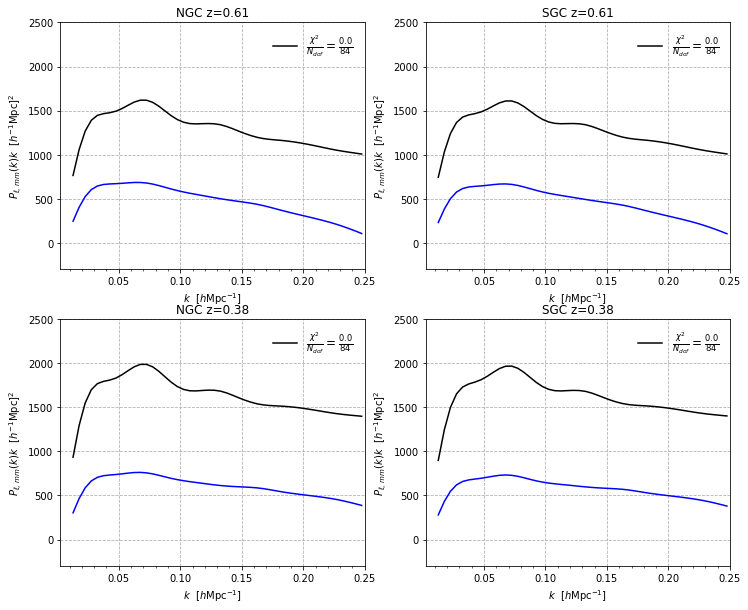

In [30]:
fiducial_ngc_z3 = BOSS_DR12(1)
fiducial_sgc_z3 = BOSS_DR12(2)
fiducial_ngc_z1 = BOSS_DR12(3)
fiducial_sgc_z1 = BOSS_DR12(4)
kvec = np.logspace(-3,np.log10(3),1000) # array of kvec in h/Mpc
#
# Create figures
#
fig_Pkmz, ax_Pkmz = plt.subplots(2,2, figsize=[12,10])


##### NUISANCE PARAMETERS ####
# assuming the same nuisance parameters for all the 4 data sets
fiducial_nuisance_params = {
    'norm':np.sqrt(1.),
    'b_1':1.9,
    'b_2':0.,
    'bg_2':0.,
    'c0':0.,
    'c2':30.,
    'c4':500.,
    'Pshot':0.
}
##############################

## Initialize the convenience functions pk_mm_real, pk_gg_l0 etc.
M_fiducial.initialize_output(kvec*M_fiducial.h(), 0.61, len(kvec))

## COMPUTE FIDUCIAL SPECTRA #######
# NB: these are fast, since no quantities are recomputed

# galaxy redshift space monopole/quadrupole/hexadecapole


### NGC z3
pk_g0_ngc_z3, pk_g2_ngc_z3 = fiducial_ngc_z3.get_theory(M_fiducial, fiducial_nuisance_params, z=0.61)
chi2_ngc_z3                = fiducial_ngc_z3.getchi2_wrt_fid(M_fiducial, fiducial_nuisance_params, 
                                                             M_fiducial, fiducial_nuisance_params, z=0.61)

### SGC z3
pk_g0_sgc_z3, pk_g2_sgc_z3 = fiducial_sgc_z3.get_theory(M_fiducial, fiducial_nuisance_params, z=0.61)
chi2_sgc_z3                = fiducial_sgc_z3.getchi2_wrt_fid(M_fiducial, fiducial_nuisance_params, 
                                                             M_fiducial, fiducial_nuisance_params, z=0.61)

### NGC z1
pk_g0_ngc_z1, pk_g2_ngc_z1 = fiducial_ngc_z1.get_theory(M_fiducial, fiducial_nuisance_params, z=0.38)
chi2_ngc_z1                = fiducial_ngc_z1.getchi2_wrt_fid(M_fiducial, fiducial_nuisance_params,
                                                             M_fiducial, fiducial_nuisance_params, z=0.38)

### SGC z1
pk_g0_sgc_z1, pk_g2_sgc_z1 = fiducial_sgc_z1.get_theory(M_fiducial, fiducial_nuisance_params, z=0.38)
chi2_sgc_z1                = fiducial_sgc_z1.getchi2_wrt_fid(M_fiducial, fiducial_nuisance_params,
                                                             M_fiducial, fiducial_nuisance_params, z=0.38)

### Plot

# NGC z3
ax_Pkmz[0,0].plot(fiducial_ngc_z3.k, np.array(pk_g0_ngc_z3)*fiducial_ngc_z3.k, color='k',linestyle='-',
                  label=r'$\frac{\chi^2}{N_{dof}}=\frac{{{{%.1f}}}}{{{%d}}}$'%(chi2_ngc_z3,48*2-12))
ax_Pkmz[0,0].plot(fiducial_ngc_z3.k, np.array(pk_g2_ngc_z3)*fiducial_ngc_z3.k, color='b',linestyle='-',)
# plot style customization
ax_Pkmz[0,0].set_xlim([0.0025,0.25])
ax_Pkmz[0,0].set_ylim([-300,2500])
ax_Pkmz[0,0].grid(linestyle='--')
ax_Pkmz[0,0].xaxis.set_minor_locator(MultipleLocator(0.01))
ax_Pkmz[0,0].set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pkmz[0,0].set_ylabel(r'$P_{\ell,\,mm}(k)k\,\,\,\, [h^{-1}\mathrm{Mpc}]^{2}$')
ax_Pkmz[0,0].set_title('NGC z=0.61')
ax_Pkmz[0,0].legend(fontsize='12',ncol=2,loc='upper right', frameon=False)


ax_Pkmz[0,1].plot(fiducial_sgc_z3.k,np.array(pk_g0_sgc_z3)*fiducial_sgc_z3.k, color='k',linestyle='-',
                 label=r'$\frac{\chi^2}{N_{dof}}=\frac{{{{%.1f}}}}{{{%d}}}$'%(chi2_sgc_z3,48*2-12))
ax_Pkmz[0,1].plot(fiducial_sgc_z3.k,np.array(pk_g2_sgc_z3)*fiducial_sgc_z3.k, color='b',linestyle='-')
ax_Pkmz[0,1].set_xlim([0.0025,0.25])
ax_Pkmz[0,1].set_ylim([-300,2500])
ax_Pkmz[0,1].grid(linestyle='--')
ax_Pkmz[0,1].legend(fontsize='12',ncol=2,loc='upper right', frameon=False)
ax_Pkmz[0,1].xaxis.set_minor_locator(MultipleLocator(0.01))
ax_Pkmz[0,1].set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pkmz[0,1].set_ylabel(r'$P_{\ell,\,mm}(k)k\,\,\,\, [h^{-1}\mathrm{Mpc}]^{2}$')
ax_Pkmz[0,1].set_title('SGC z=0.61')


ax_Pkmz[1,0].plot(fiducial_ngc_z1.k,np.array(pk_g0_ngc_z1)*fiducial_ngc_z1.k, color='k',linestyle='-',
                  label=r'$\frac{\chi^2}{N_{dof}}=\frac{{{{%.1f}}}}{{{%d}}}$'%(chi2_ngc_z1,48*2-12))
ax_Pkmz[1,0].plot(fiducial_ngc_z1.k,np.array(pk_g2_ngc_z1)*fiducial_ngc_z1.k, color='b',linestyle='-')
ax_Pkmz[1,0].set_xlim([0.0025,0.25])
ax_Pkmz[1,0].set_ylim([-300,2500])
ax_Pkmz[1,0].grid(linestyle='--')
ax_Pkmz[1,0].xaxis.set_minor_locator(MultipleLocator(0.01))
ax_Pkmz[1,0].set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pkmz[1,0].set_ylabel(r'$P_{\ell,\,mm}(k)k\,\,\,\, [h^{-1}\mathrm{Mpc}]^{2}$')
ax_Pkmz[1,0].set_title('NGC z=0.38')
ax_Pkmz[1,0].legend(fontsize='12',ncol=1,loc='upper right', frameon=False)


ax_Pkmz[1,1].plot(fiducial_sgc_z1.k,np.array(pk_g0_sgc_z1)*fiducial_sgc_z1.k, color='k',linestyle='-',
                 label=r'$\frac{\chi^2}{N_{dof}}=\frac{{{{%.1f}}}}{{{%d}}}$'%(chi2_sgc_z1,48*2-12))
ax_Pkmz[1,1].plot(fiducial_sgc_z1.k,np.array(pk_g2_sgc_z1)*fiducial_sgc_z1.k, color='b',linestyle='-')
ax_Pkmz[1,1].set_xlim([0.0025,0.25])
ax_Pkmz[1,1].set_ylim([-300,2500])
ax_Pkmz[1,1].grid(linestyle='--')
ax_Pkmz[1,1].xaxis.set_minor_locator(MultipleLocator(0.01))
ax_Pkmz[1,1].set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pkmz[1,1].set_ylabel(r'$P_{\ell,\,mm}(k)k\,\,\,\, [h^{-1}\mathrm{Mpc}]^{2}$')
ax_Pkmz[1,1].set_title('SGC z=0.38')
ax_Pkmz[1,1].legend(fontsize='12',ncol=1,loc='upper right', frameon=False)

plt.show()
#plt.savefig("bestfit_vis.pdf", format='pdf')

In [31]:
# save those theoretical data vectors
dest = '/Users/jiachuanxu/Workspace/lss_montepython/data/'
subdirs = [dest+'ngc_z3/', dest+'sgc_z3/', dest+'ngc_z1/', dest+'sgc_z1/']
Pk0_datavecs = [pk_g0_ngc_z3, pk_g0_sgc_z3, pk_g0_ngc_z1, pk_g0_sgc_z1]
Pk2_datavecs = [pk_g2_ngc_z3, pk_g2_sgc_z3, pk_g2_ngc_z1, pk_g2_sgc_z1]
datasets     = [fiducial_ngc_z3, fiducial_sgc_z3, fiducial_ngc_z1, fiducial_sgc_z1] 
for i,subdir in enumerate(subdirs):
    fname = subdir+'pk_noisefree.dat'
    dataset = datasets[i]
    Pk0 = Pk0_datavecs[i]
    Pk2 = Pk2_datavecs[i]
    with open(fname, 'w') as fp:
        fp.write('# theoretical data vector\n')
        fp.write('# k Pk0 Pk2\n')
        fp.write('# Fiducial parameters:\n')
        for key in FiducialCosmology.keys():
            fp.write('# {0} = {1}\n'.format(key, FiducialCosmology[key]))
        for key in fiducial_nuisance_params.keys():
            fp.write('# {0} = {1}\n'.format(key, fiducial_nuisance_params[key]))
        for j,k in enumerate(dataset.k):
            fp.write('{0}\t{1}\t{2}\n'.format(k, Pk0[j], Pk2[j]))
    print("Written file {0}".format(fname))

Written file /Users/jiachuanxu/Workspace/lss_montepython/data/ngc_z3/pk_noisefree.dat
Written file /Users/jiachuanxu/Workspace/lss_montepython/data/sgc_z3/pk_noisefree.dat
Written file /Users/jiachuanxu/Workspace/lss_montepython/data/ngc_z1/pk_noisefree.dat
Written file /Users/jiachuanxu/Workspace/lss_montepython/data/sgc_z1/pk_noisefree.dat


In [ ]:
# write a class method to calculate chi2 wrt some fiducial cosmology

-1
